## Persiapan Dataset


In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [48]:
data=pd.read_csv("./Dataset/citrus 2.csv")
df = pd.DataFrame(data)
df.head(10)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [49]:
# Memisahkan fitur dan label
X = data.drop('name', axis=1)
y = data['name']

In [50]:
X

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [51]:
y

0           orange
1           orange
2           orange
3           orange
4           orange
           ...    
9995    grapefruit
9996    grapefruit
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: name, Length: 10000, dtype: object

## Prepocessing data

In [52]:
# Memisahkan data menjadi set pelatihan dan pengujian (80% train, 20% test)
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decition Tree


In [53]:
from sklearn import tree
dtree = DecisionTreeClassifier()
dtree 

# tree.plot_tree(dtree, feature_names=y)

DecisionTreeClassifier()

In [54]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
# Membuat prediksi pada data uji
y_pred = dtree.predict(X_test)
y_pred

array(['grapefruit', 'grapefruit', 'orange', ..., 'grapefruit', 'orange',
       'grapefruit'], dtype=object)

In [57]:
# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [58]:
print("Akurasi:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Akurasi: 0.9445
Classification Report:
               precision    recall  f1-score   support

  grapefruit       0.94      0.95      0.94       988
      orange       0.95      0.94      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Confusion Matrix:
 [[937  51]
 [ 60 952]]


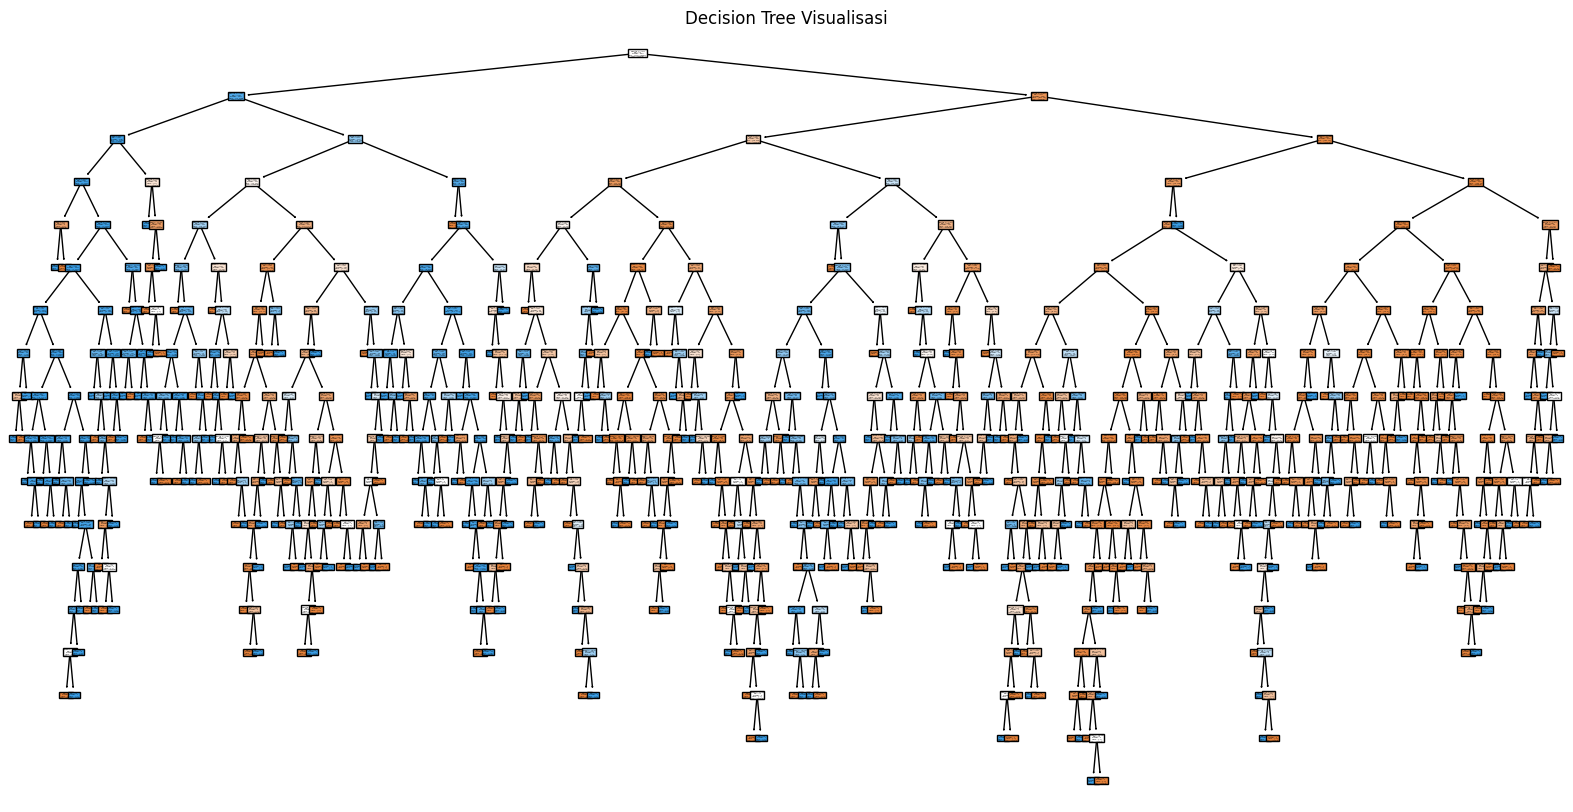

In [59]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=dtree.classes_, filled=True)
plt.title("Decision Tree Visualisasi")
plt.show()

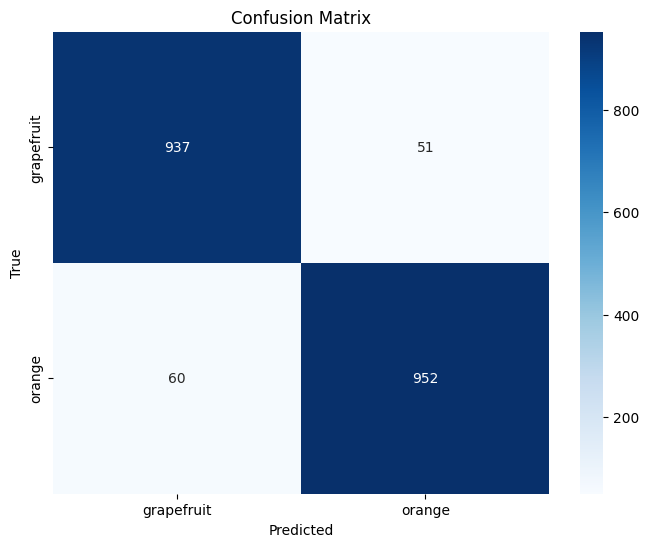

In [60]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Meminta input dari pengguna satu per satu
diameter = float(input("Masukkan diameter: "))
weight = float(input("Masukkan weight: "))
red = float(input("Masukkan red: "))
green = float(input("Masukkan green: "))
blue = float(input("Masukkan blue: "))

# Membentuk input ke dalam bentuk 2D array
input_features = [[diameter, weight, red, green, blue]]

# Membuat prediksi berdasarkan input pengguna
prediction = dtree.predict(input_features)
predicted_class = prediction[0]
print(f"Prediksi kelas untuk input fitur {input_features[0]} adalah: {predicted_class}")

Prediksi kelas untuk input fitur [2.96, 86.76, 172.0, 85.0, 2.0] adalah: orange


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
